# Clustering-K Means-Airlines data

In [52]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Load data
df = pd.read_excel(r'D:\Data science\Assignments\Clustering\EastWestAirlines.xlsx',sheet_name='data',index_col=0)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [4]:
#EDA

In [5]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [7]:
#Duplicates
df.duplicated().sum()

1

In [8]:
#Print the duplicated values
df[df.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
df[(df['Balance'] == 1000) & (df['Days_since_enroll'] ==1597)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
df.duplicated(keep='last')

ID#
1       False
2       False
3       False
4       False
5       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Length: 3999, dtype: bool

In [11]:
df.drop_duplicates(inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [12]:
df.shape

(3998, 11)

In [13]:
df.duplicated().sum()

0

In [ ]:
#Outlier detection

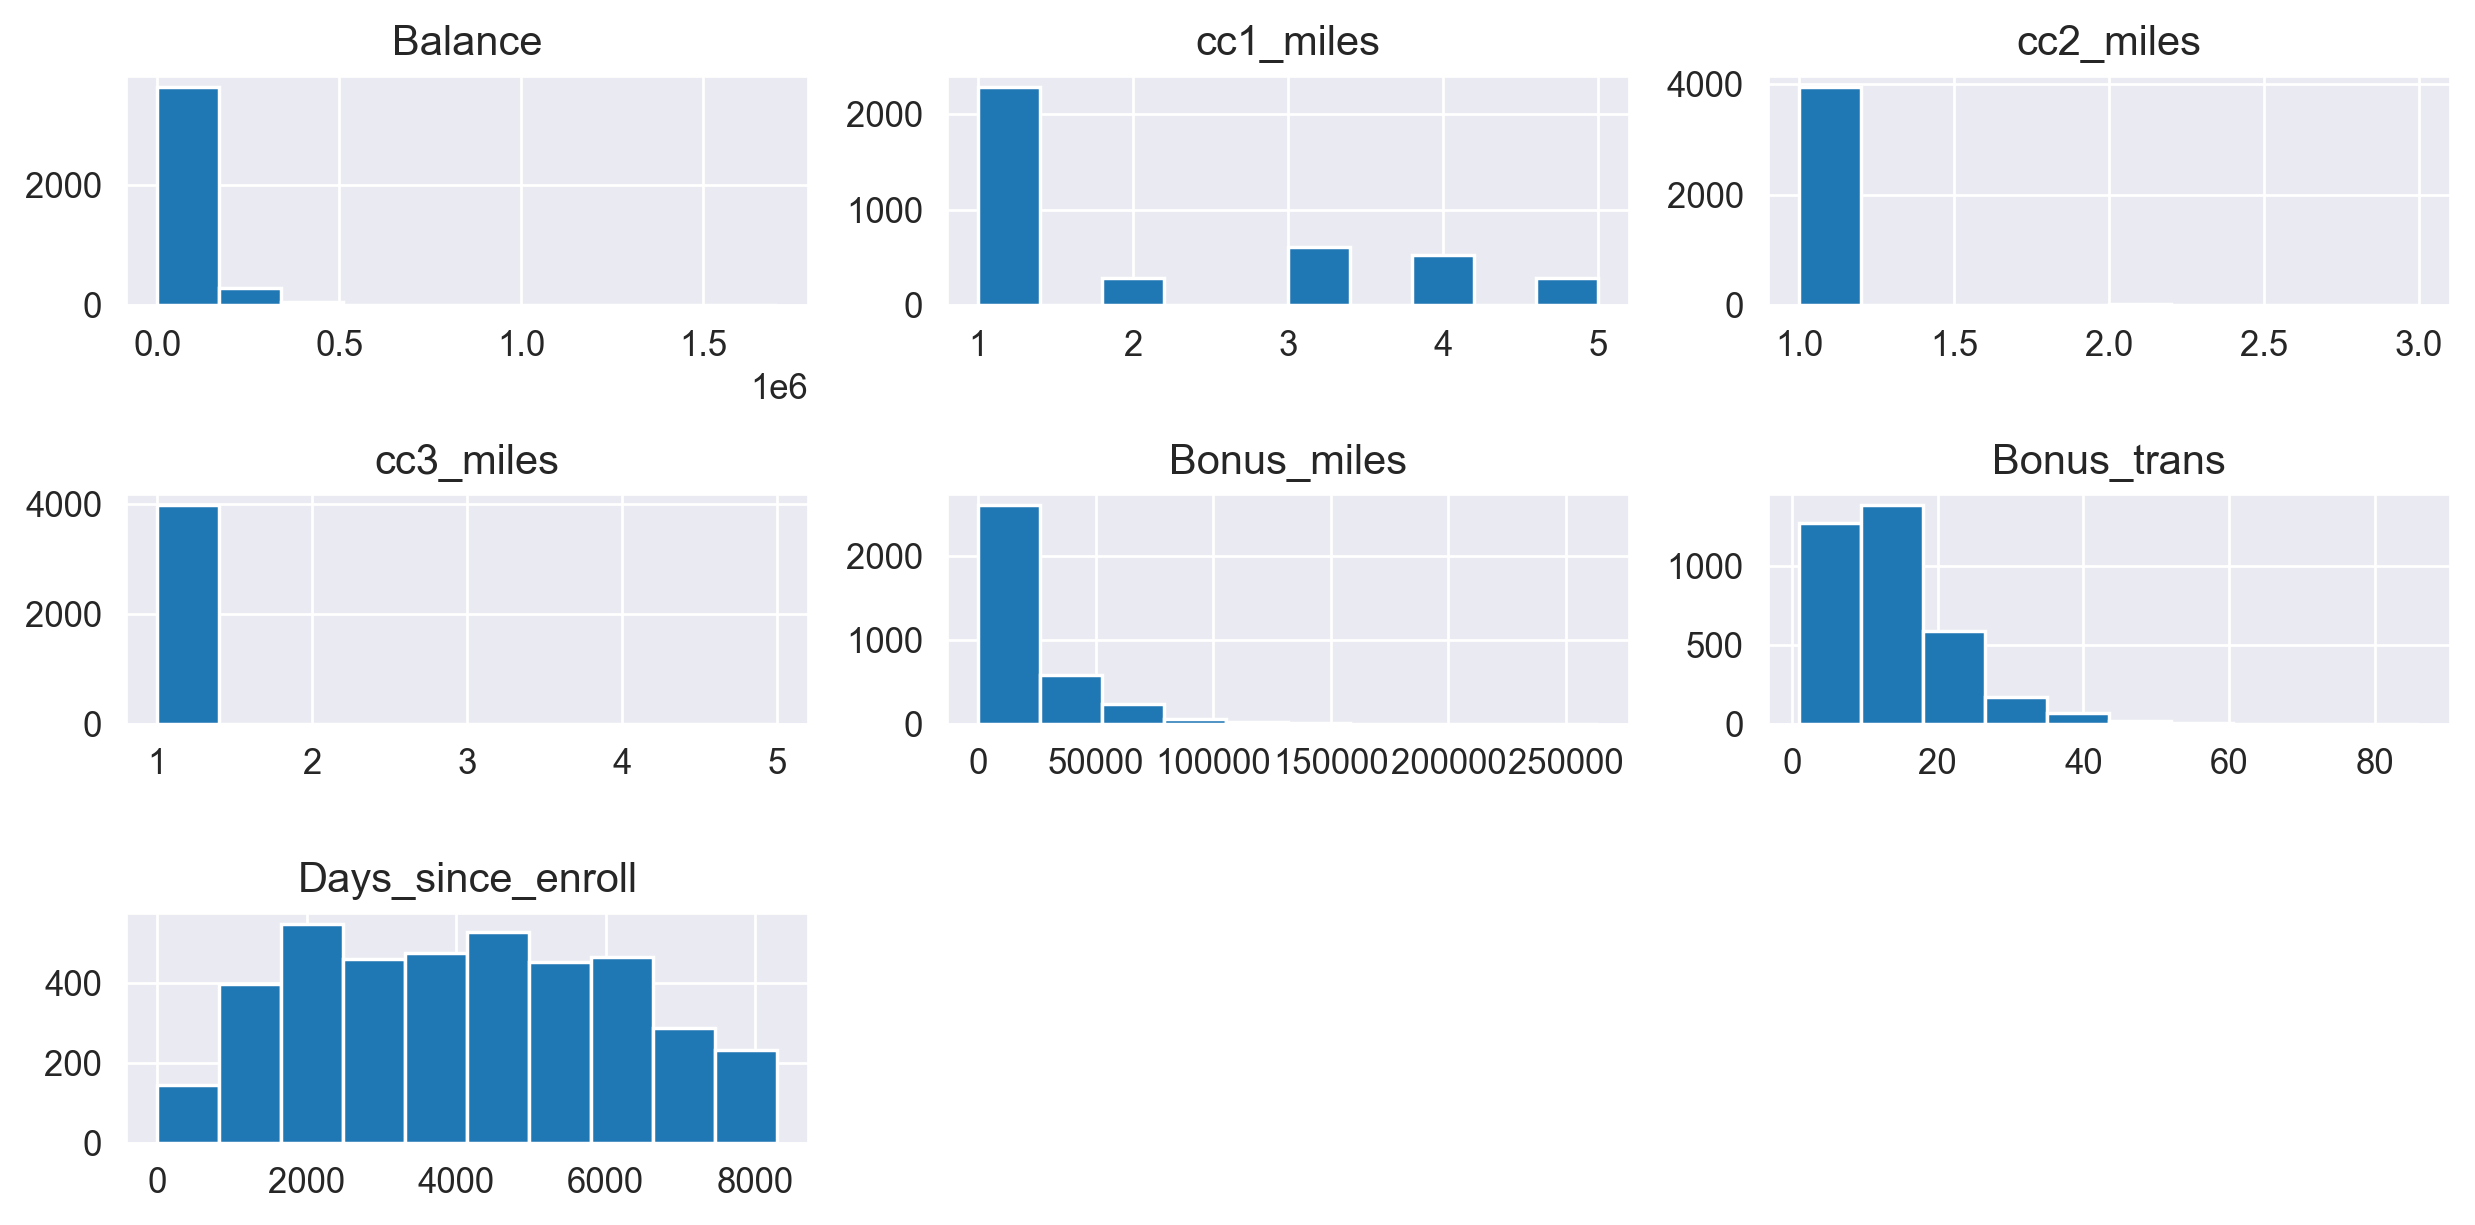

In [22]:
df.hist()
plt.tight_layout()

In [ ]:
#from  scatter plot cc2_miles and cc3_miles have same value so we can drop those columns

<Axes: xlabel='Days_since_enroll'>

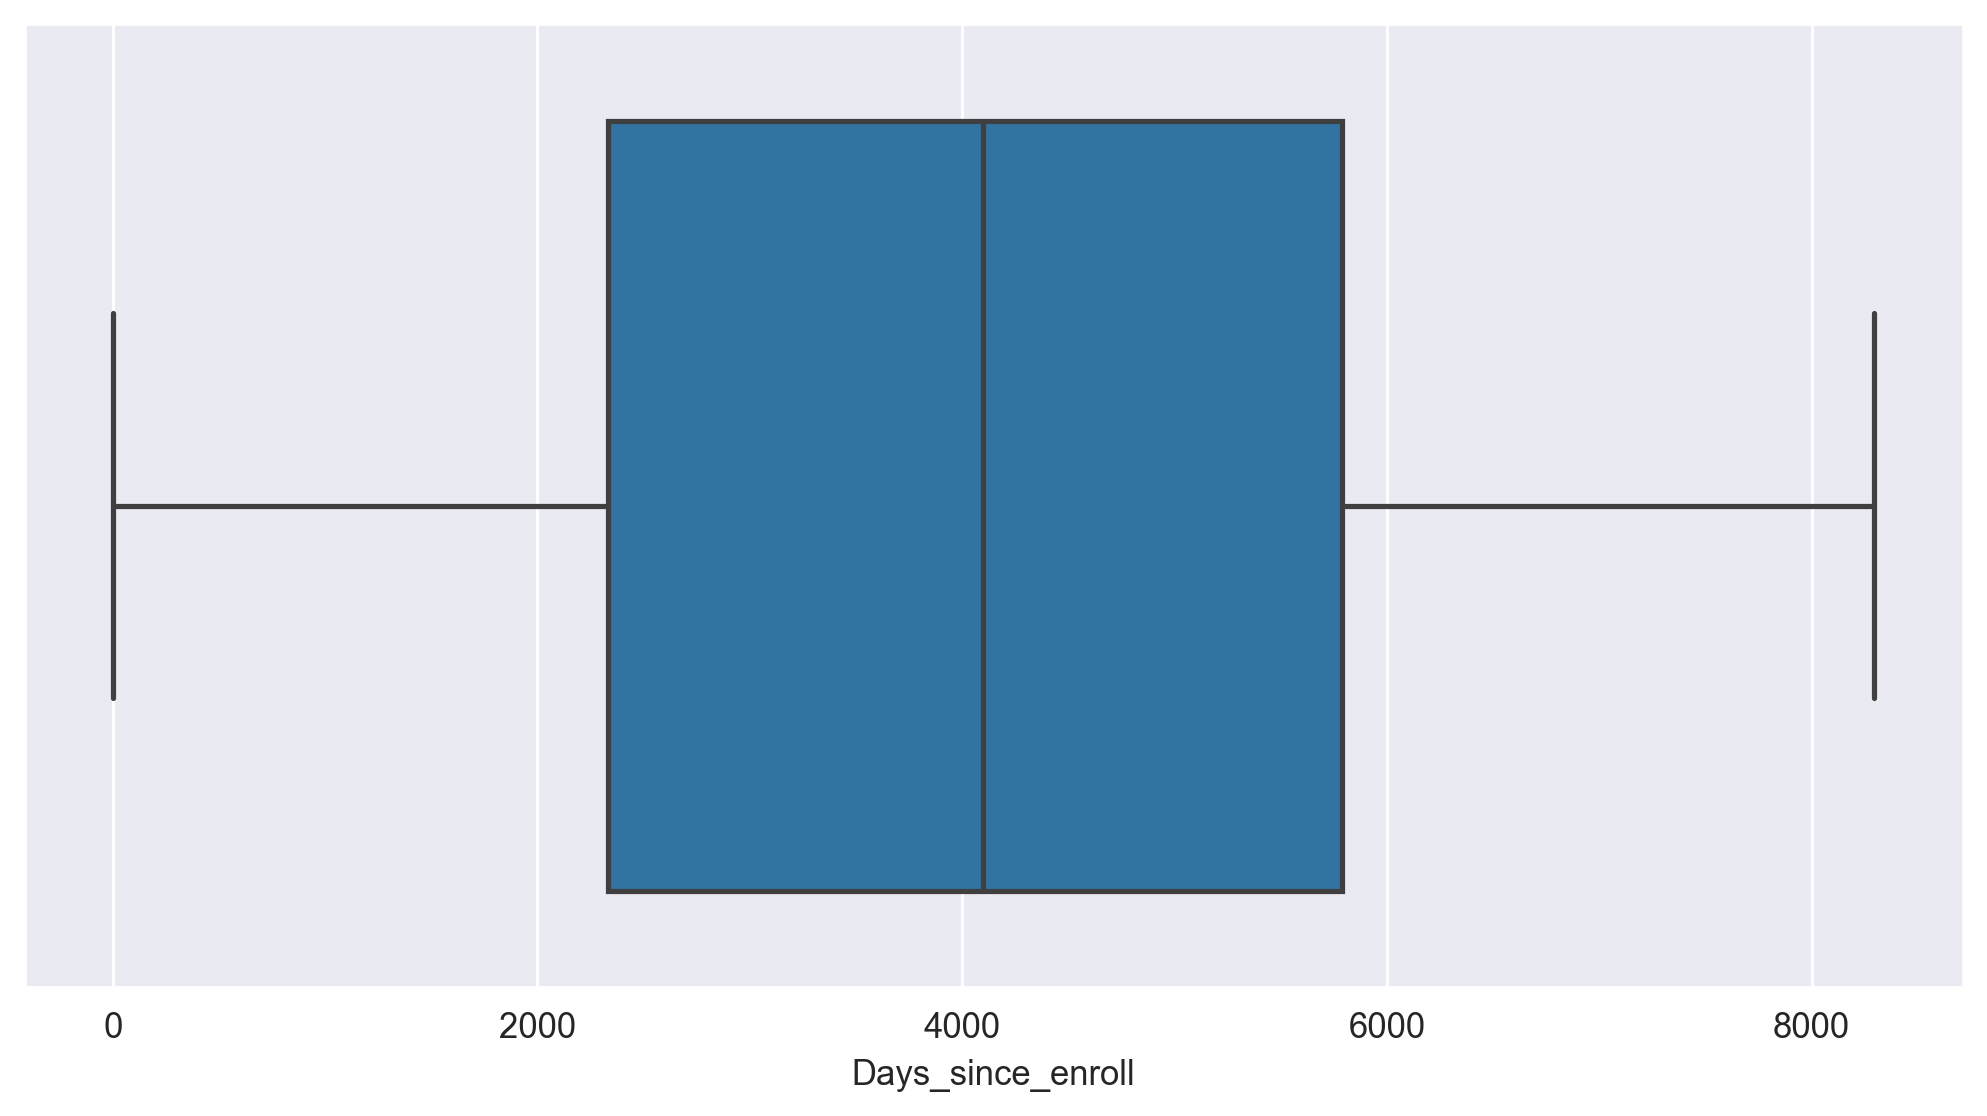

In [23]:
sns.boxplot(x=df['Days_since_enroll'])

In [14]:
#Rename the columns
df.rename(columns={'Award?':'Award'},inplace=True)
df.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0


In [15]:
#Missing values

In [16]:
columns_to_replace = ['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143.0,NaN,1,1,1,174.0,1.0,NaN,NaN,7000,NaN
2,19244.0,NaN,1,1,1,215.0,2.0,NaN,NaN,6968,NaN
3,41354.0,NaN,1,1,1,4123.0,4.0,NaN,NaN,7034,NaN
4,14776.0,NaN,1,1,1,500.0,1.0,NaN,NaN,6952,NaN
5,97752.0,NaN,4,1,1,43300.0,26.0,2077.0,4.0,6935,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476.0,NaN,1,1,1,8525.0,4.0,200.0,1.0,1403,1.0
4018,64385.0,NaN,1,1,1,981.0,5.0,NaN,NaN,1395,1.0
4019,73597.0,NaN,3,1,1,25447.0,8.0,NaN,NaN,1402,1.0


In [17]:
#Checking null values

In [18]:
#Calculate the percentage of missig values in each column.
x=df.isnull().sum()
x

Balance                 1
Qual_miles           3772
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles           474
Bonus_trans           474
Flight_miles_12mo    2722
Flight_trans_12      2722
Days_since_enroll       0
Award                2517
dtype: int64

In [19]:
def missing_percent (x):
    y =(x/len(df))*100
    return y

In [20]:
missing_percent(x) 

Balance               0.025013
Qual_miles           94.347174
cc1_miles             0.000000
cc2_miles             0.000000
cc3_miles             0.000000
Bonus_miles          11.855928
Bonus_trans          11.855928
Flight_miles_12mo    68.084042
Flight_trans_12      68.084042
Days_since_enroll     0.000000
Award                62.956478
dtype: float64

Rule for missing value imputation:

If NA values are between 1 to 5%, drop na (rows)

If NA value are 5 to 40%, fillna(replace)

If NA values are greater than 50% in a column, drop that entire column

As in our data below columns has missing value percent greater than 50% dropping those columns 

Qual_miles           94.347174

Flight_miles_12mo    68.084042

Flight_trans_12      68.084042

Award                62.956478


In [21]:
df.drop(columns=['Qual_miles','Flight_miles_12mo','Flight_trans_12','Award'],inplace=True)
df

,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,,,
1,28143.0,1,1,1,174.0,1.0,7000
2,19244.0,1,1,1,215.0,2.0,6968
3,41354.0,1,1,1,4123.0,4.0,7034
4,14776.0,1,1,1,500.0,1.0,6952
5,97752.0,4,1,1,43300.0,26.0,6935
...,...,...,...,...,...,...,...
4017,18476.0,1,1,1,8525.0,4.0,1403
4018,64385.0,1,1,1,981.0,5.0,1395
4019,73597.0,3,1,1,25447.0,8.0,1402


In [25]:
df.drop(columns=['cc2_miles','cc3_miles'],inplace=True)  ## drop as same value 1 throughtout the column
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.0,1.0,7000
2,19244.0,1,215.0,2.0,6968
3,41354.0,1,4123.0,4.0,7034
4,14776.0,1,500.0,1.0,6952
5,97752.0,4,43300.0,26.0,6935
...,...,...,...,...,...
4017,18476.0,1,8525.0,4.0,1403
4018,64385.0,1,981.0,5.0,1395
4019,73597.0,3,25447.0,8.0,1402


In [ ]:
# replacing the null values with mean() as no outlier present
#Bonus_miles
#Bonus_trans
#Balance

In [26]:
df['Bonus_miles'].mean()

19455.800227014755

In [27]:
df['Bonus_miles'].fillna(df['Bonus_miles'].mean(),inplace=True)
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.000000,1.0,7000
2,19244.0,1,215.000000,2.0,6968
3,41354.0,1,4123.000000,4.0,7034
4,14776.0,1,500.000000,1.0,6952
5,97752.0,4,43300.000000,26.0,6935
...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.0,1403
4018,64385.0,1,981.000000,5.0,1395
4019,73597.0,3,25447.000000,8.0,1402


In [28]:
df['Bonus_trans'].mean()

13.16572077185017

In [29]:
df['Bonus_trans'].fillna(df['Bonus_trans'].mean(),inplace=True)
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.000000,1.000000,7000
2,19244.0,1,215.000000,2.000000,6968
3,41354.0,1,4123.000000,4.000000,7034
4,14776.0,1,500.000000,1.000000,6952
5,97752.0,4,43300.000000,26.000000,6935
...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.000000,1403
4018,64385.0,1,981.000000,5.000000,1395
4019,73597.0,3,25447.000000,8.000000,1402


In [35]:
df['Balance'].mean()

73637.90567925945

In [36]:
df['Balance'].fillna(df['Balance'].mean(),inplace=True)
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
ID#,,,,,
1,28143.0,1,174.000000,1.000000,7000
2,19244.0,1,215.000000,2.000000,6968
3,41354.0,1,4123.000000,4.000000,7034
4,14776.0,1,500.000000,1.000000,6952
5,97752.0,4,43300.000000,26.000000,6935
...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.000000,1403
4018,64385.0,1,981.000000,5.000000,1395
4019,73597.0,3,25447.000000,8.000000,1402


In [37]:
df.isna().sum()

Balance              0
cc1_miles            0
Bonus_miles          0
Bonus_trans          0
Days_since_enroll    0
dtype: int64

# Creating a model

In [ ]:
#Standardization

In [39]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-4.51506798e-01, -7.69731660e-01, -8.26975269e-01,
        -1.41342147e+00,  1.39523468e+00],
       [-5.39823478e-01, -7.69731660e-01, -8.25216824e-01,
        -1.29724081e+00,  1.37973643e+00],
       [-3.20396376e-01, -7.69731660e-01, -6.57606989e-01,
        -1.06487949e+00,  1.41170157e+00],
       ...,
       [-4.05961766e-04,  6.82893866e-01,  2.56955989e-01,
        -6.00156848e-01, -1.31599028e+00],
       [-1.85971224e-01, -7.69731660e-01, -8.12993486e-01,
        -1.41342147e+00, -1.31647460e+00],
       [-7.00875626e-01, -7.69731660e-01,  0.00000000e+00,
        -2.06378310e-16, -1.31792757e+00]])

In [ ]:
#Model Building

In [40]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([5, 5, 5, ..., 3, 0, 7])

In [41]:
#cluster centre
km.cluster_centers_

array([[-0.34531649, -0.75169252, -0.70426367, -1.06275331, -0.81073533],
       [ 0.1684931 ,  0.9978691 ,  0.38075094,  0.41188023,  1.01304651],
       [ 0.85952824,  2.02138453,  2.53987902,  1.12678568,  0.61090738],
       [ 0.00670524,  0.99586864,  0.35943138,  0.3341469 , -0.57145263],
       [ 0.27249019,  0.42120765,  0.47375813,  2.78360487, -0.09265066],
       [-0.16983736, -0.68397059, -0.49473143, -0.45113607,  0.88158037],
       [ 5.16597025,  0.56364849,  0.83879492,  0.70614978,  0.99297415],
       [-0.38742819, -0.65458451, -0.283934  ,  0.15119364, -0.87497598]])

In [44]:
km.inertia_ 

6259.043627357127

# Elbow graph

In [45]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [46]:
wcss

[19989.999999999978,
 12934.850790438984,
 10800.833276369684,
 9248.738748561245,
 8043.134243131941,
 7332.73836351074,
 6756.512572345903,
 6259.1084559901055,
 5818.514824350597,
 5417.645214299959]

Text(0.5, 1.0, 'Elbow Graph')

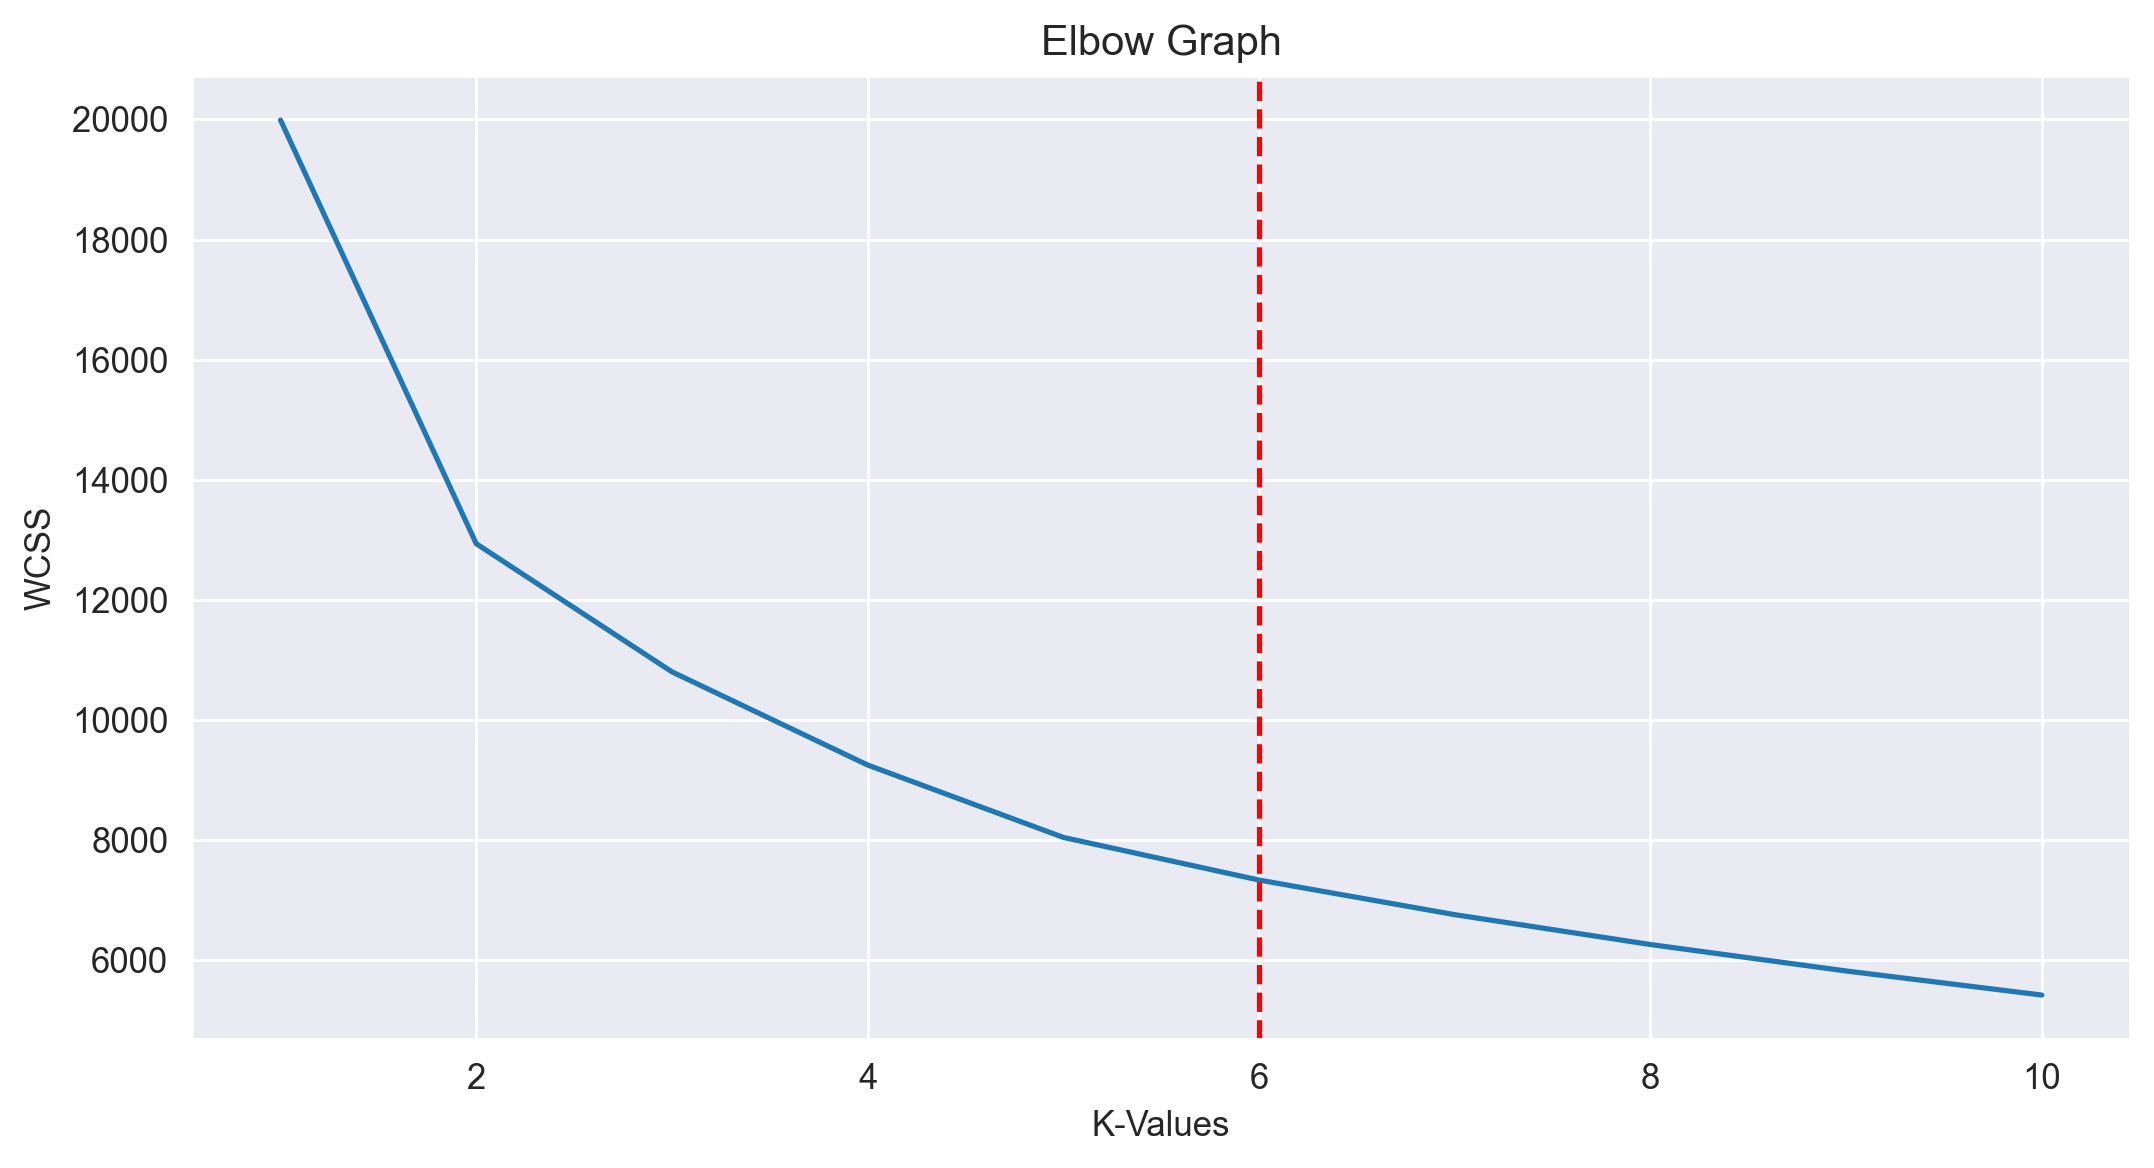

In [48]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 6, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [ ]:
# this graph consider k=6 as WCSS value is moderate at that point , we need less WCSS value

In [62]:
km = KMeans(n_clusters=6)
ypred = km.fit_predict(x)
ypred

array([5, 5, 5, ..., 4, 0, 4])

In [ ]:
#Visualize the clusters

In [63]:
km.cluster_centers_

array([[-0.35106209, -0.75043349, -0.69472733, -1.01338395, -0.81090857],
       [ 0.75276194,  1.88840114,  2.31969438,  1.47047124,  0.46760514],
       [ 0.13604801,  1.05637893,  0.43404452,  0.46595601,  0.40661576],
       [ 4.99831533,  0.65344875,  0.98168665,  0.68463081,  0.99990497],
       [-0.31782716, -0.37087516, -0.20695821,  0.32787388, -0.90082929],
       [-0.17297648, -0.66962618, -0.48273077, -0.41080862,  0.88451455]])

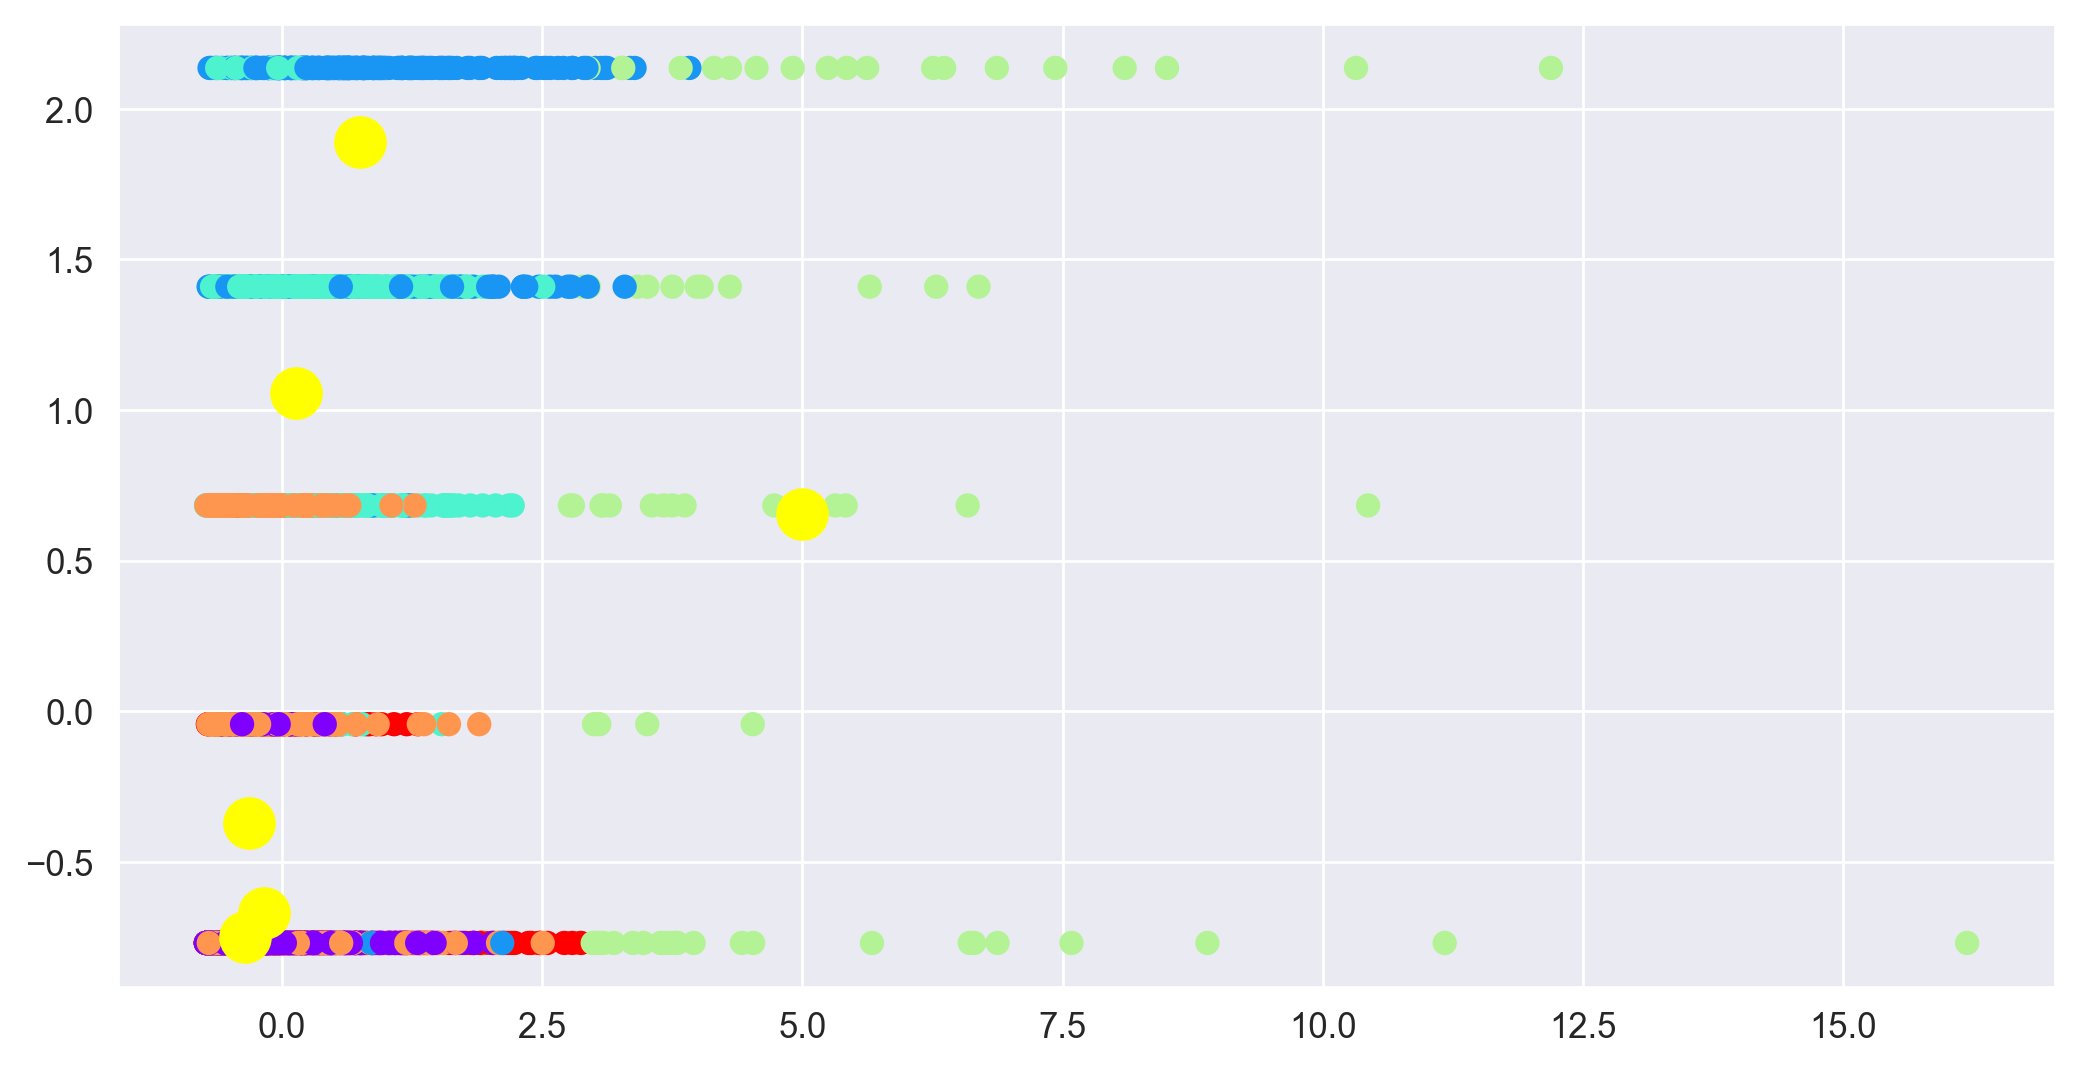

In [64]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 200)

# Evaluation of Kmeans

In [ ]:
#Silhouette score

In [65]:
silhouette_score(x,ypred)

0.2525383154333188

In [ ]:
#Analyzing clusters

In [66]:
df['cluster'] = ypred
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,cluster
ID#,,,,,,
1,28143.0,1,174.000000,1.000000,7000,5
2,19244.0,1,215.000000,2.000000,6968,5
3,41354.0,1,4123.000000,4.000000,7034,5
4,14776.0,1,500.000000,1.000000,6952,5
5,97752.0,4,43300.000000,26.000000,6935,2
...,...,...,...,...,...,...
4017,18476.0,1,8525.000000,4.000000,1403,0
4018,64385.0,1,981.000000,5.000000,1395,0
4019,73597.0,3,25447.000000,8.000000,1402,4


In [67]:
df[df['cluster'] == 0].mean()
df[df['cluster'] == 1].mean()
df[df['cluster'] == 2].mean()
df[df['cluster'] == 3].mean()
df[df['cluster'] == 4].mean()
df[df['cluster'] == 5].mean()

Balance              56208.381288
cc1_miles                1.137827
Bonus_miles           8200.423381
Bonus_trans              9.629774
Days_since_enroll     5945.490946
cluster                  5.000000
dtype: float64

In [68]:
df.groupby('cluster').agg('mean')

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll
cluster,,,,,
0,38264.049517,1.026570,3257.500000,4.443237,2444.867150
1,149488.000000,4.659763,73541.920118,25.822485,5084.677515
2,87346.428896,3.514221,29576.005688,17.176337,4958.749716
3,577280.121622,2.959459,42344.859466,19.058533,6183.743243
4,41612.880119,1.549153,14630.351261,15.987825,2259.203390
5,56208.381288,1.137827,8200.423381,9.629774,5945.490946
